# Exercises 3.03 - Working with files

## A common data analysis workflow
In this exercise, you will implement step-by-step a common workflow for analyzing and aggregating experimental datasets:
- Experimental data were collected over multiple days, with the data for each day in a separate subdirectory in `behavioral_data`.
- During the day, the animal was trained. The animal was tested in 40 trials before ("initial") and after ("final") training and the resulting behavioral scores were saved in separate files in each day's folder.

We want to:
1. compute the average initial and final score for each days
2. plot the initial and final average scores across days. 

To do that we need to:
1. Discover the data files
2. Load and process the data files for each day and epoch (initial/final)
3. Save the processed results in a file
4. Load and plot the results

### Exercise 1 - processing and generating file paths
The behavioral data is organized in the following folder structure:
`behavioral_data/DATENAME/DATA_FILE_NAME.SUFFIX`

Familiarize yourself with how the directory is organized using the windows file explorer or mac file finder.

We want to process the data, and save the results into the following path:
`behavioral_results/DATENAME/DATA_FILE_NAME.SUFFIX`. In exercise one, you will generate the paths for the results file from the paths of the data file.

To make this concrete: Say the data file is at 'behavioral_data/20230914/final_behavioral_scores.csv'. Generate a path so we can save the results file to 'behavioral_results/20230914/final_behavioral_scores.txt'. What we need to change is the top directory from 'behavioral_data' to 'behavioral_results' and the extension from 'csv' to 'txt'. We keep the names of the experiment directory and of the data file.

#### 1) Take the path for the data file apart:
You are given the following path: 'behavioral_data/20230914/final_behavioral_scores.csv'

As a first step, use path manipulations to extract the following information form the path:
- the parent directory ('behavioral_data')
- the directory for the experiment ('20230914')
- the stem of the data file ('final_behavioral_scores')
- the suffix of the data file ('.csv')

In [18]:
import os
path = 'behavioral_data/20230914/final_behavioral_scores.csv'

# your solution


all parts: ['behavioral_data', '20230914', 'final_behavioral_scores.csv']
top directory: behavioral_data
experiment directory: 20230914
file stem: final_behavioral_scores
file suffix: .csv


#### 2) Reassemble the parts to form the path for the results file:
For the data file in 'behavioral_data/20230914/final_behavioral_scores.csv', the results should be in
'behavioral_results/20230914/final_behavioral_scores.txt'.


In [19]:
# your solution


behavioral_results/20230914/final_behavioral_scores.txt


### Exercise 2 - Discovering files
To process all data files in the folder `behavioral_data`, we first need to discover them, using `glob`.

#### 1) List all files in a folder
The subfolder `20230914` in `behavioral_data` contains a bunch of files. Use `glob` to list all files in that folder:

In [17]:
# your solution


['behavioral_data/20230914/initial_behavioral_scores.csv', 'behavioral_data/20230914/final_behavioral_scores.csv', 'behavioral_data/20230914/broken.msg']


#### 2) List only the data files (ending in .csv) in the sub folder
The listing above yielded 3 files - two data files ending in '.csv' and one garbage file called 'broken.msg'. We only want to list the data files - not the garbage file.

Modify your code that uses `glob` above to list only the '.csv' files, but no other files that might exist in that folder.

In [21]:
# your solution


['behavioral_data/20230914/initial_behavioral_scores.csv', 'behavioral_data/20230914/final_behavioral_scores.csv']


#### 3) List all data files (ending in csv) in all sub folders
We want to process *all* data files - from all days in `behavioral_results`, not just the ones from the day `20230914`.

Modify your code that uses `glob` above to list all the csv files in all subfolders in `behavioral_data`. Use a single command - no for loop!

In [23]:
# your solution


['behavioral_data/20230912/final_behavioral_scores.csv', 'behavioral_data/20230912/initial_behavioral_scores.csv', 'behavioral_data/20230913/final_behavioral_scores.csv', 'behavioral_data/20230913/initial_behavioral_scores.csv', 'behavioral_data/20230914/final_behavioral_scores.csv', 'behavioral_data/20230914/initial_behavioral_scores.csv', 'behavioral_data/20230915/final_behavioral_scores.csv', 'behavioral_data/20230915/initial_behavioral_scores.csv', 'behavioral_data/20230916/final_behavioral_scores.csv', 'behavioral_data/20230916/initial_behavioral_scores.csv', 'behavioral_data/20230917/final_behavioral_scores.csv', 'behavioral_data/20230917/initial_behavioral_scores.csv']


### Exercise 3 - Manipulate file names in a list
Now that we have a listing of the data files, we can now take apart the names of the data files and generate the names for results files. We will basically apply what we have done in exercises 1 + 2 above to all paths, using a for loop.

#### 1) Take the path for the data file apart:
As a first step, take the first file in the list `data_files`.

Use path manipulations to extract the following information form the path:
- the parent directory ('behavioral_data')
- the directory for the experiment ('20230912')
- the stem of the data file ('final_behavioral_scores)
- the suffix of the data file ('.csv')

In [28]:
data_files = ['behavioral_data/20230912/final_behavioral_scores.csv', 'behavioral_data/20230912/initial_behavioral_scores.csv', 'behavioral_data/20230913/final_behavioral_scores.csv', 'behavioral_data/20230913/initial_behavioral_scores.csv', 'behavioral_data/20230914/final_behavioral_scores.csv', 'behavioral_data/20230914/initial_behavioral_scores.csv', 'behavioral_data/20230915/final_behavioral_scores.csv', 'behavioral_data/20230915/initial_behavioral_scores.csv', 'behavioral_data/20230916/final_behavioral_scores.csv', 'behavioral_data/20230916/initial_behavioral_scores.csv', 'behavioral_data/20230917/final_behavioral_scores.csv', 'behavioral_data/20230917/initial_behavioral_scores.csv']

# your solution


behavioral_data/20230912/final_behavioral_scores.csv
['behavioral_data', '20230912', 'final_behavioral_scores.csv'] 20230912 final_behavioral_scores.csv final_behavioral_scores .csv


#### 2) Reassemble the parts from the first file name form the path for the results file
Now take the file parts and reassemble/modify them to generate the path for a results file.

For the data file in 'behavioral_data/20230912/final_behavioral_scores.csv', the results should be in
'behavioral_results/20230912/final_behavioral_scores.txt'.

In [29]:
# your solution


behavioral_results/20230912/final_behavioral_scores.txt


#### 3) Apply steps 1 + 2 to all files in the list
Now take apart the names of the data files and reassemble them to the names of the results files for files in `data_files`.

Collect the names of the results files in a new list called `results_file_names`.

In [30]:
data_files = ['behavioral_data/20230912/final_behavioral_scores.csv', 'behavioral_data/20230912/initial_behavioral_scores.csv', 'behavioral_data/20230913/final_behavioral_scores.csv', 'behavioral_data/20230913/initial_behavioral_scores.csv', 'behavioral_data/20230914/final_behavioral_scores.csv', 'behavioral_data/20230914/initial_behavioral_scores.csv', 'behavioral_data/20230915/final_behavioral_scores.csv', 'behavioral_data/20230915/initial_behavioral_scores.csv', 'behavioral_data/20230916/final_behavioral_scores.csv', 'behavioral_data/20230916/initial_behavioral_scores.csv', 'behavioral_data/20230917/final_behavioral_scores.csv', 'behavioral_data/20230917/initial_behavioral_scores.csv']

# your solution


behavioral_data/20230912/final_behavioral_scores.csv
behavioral_results/20230912/final_behavioral_scores.txt
behavioral_data/20230912/initial_behavioral_scores.csv
behavioral_results/20230912/initial_behavioral_scores.txt
behavioral_data/20230913/final_behavioral_scores.csv
behavioral_results/20230913/final_behavioral_scores.txt
behavioral_data/20230913/initial_behavioral_scores.csv
behavioral_results/20230913/initial_behavioral_scores.txt
behavioral_data/20230914/final_behavioral_scores.csv
behavioral_results/20230914/final_behavioral_scores.txt
behavioral_data/20230914/initial_behavioral_scores.csv
behavioral_results/20230914/initial_behavioral_scores.txt
behavioral_data/20230915/final_behavioral_scores.csv
behavioral_results/20230915/final_behavioral_scores.txt
behavioral_data/20230915/initial_behavioral_scores.csv
behavioral_results/20230915/initial_behavioral_scores.txt
behavioral_data/20230916/final_behavioral_scores.csv
behavioral_results/20230916/final_behavioral_scores.txt
beh

### Exercise 4 - Processing files
We have a list of all data files in the folder `behavioral_data`. Let's process the data.

#### 1) Load data from a single file
As a first step, take the first file in the list `data_files`.

Load the data from the file using `np.loadtxt`.

In [32]:
data_files = ['behavioral_data/20230912/final_behavioral_scores.csv', 'behavioral_data/20230912/initial_behavioral_scores.csv', 'behavioral_data/20230913/final_behavioral_scores.csv', 'behavioral_data/20230913/initial_behavioral_scores.csv', 'behavioral_data/20230914/final_behavioral_scores.csv', 'behavioral_data/20230914/initial_behavioral_scores.csv', 'behavioral_data/20230915/final_behavioral_scores.csv', 'behavioral_data/20230915/initial_behavioral_scores.csv', 'behavioral_data/20230916/final_behavioral_scores.csv', 'behavioral_data/20230916/initial_behavioral_scores.csv', 'behavioral_data/20230917/final_behavioral_scores.csv', 'behavioral_data/20230917/initial_behavioral_scores.csv']

# your solution


[0.22274863 0.40350196 0.         0.56353078 0.519613   0.21905378
 0.37689013 0.2829951  0.13681079 0.28961837 0.44172765 0.21148458
 0.21238843 0.26258821 0.34724939 0.48806321 0.16922012 0.35973271
 0.31101933 0.         0.20511392 0.25294518 0.26840496 0.32933391
 0.         0.28270925 0.16205407 0.0350935  0.36238274 0.3975466
 0.16612496 0.41540938 0.21141392 0.2860815  0.09187684 0.53908118
 0.         0.2597579  0.39085327 0.        ]


#### 2) Compute the mean
Compute the mean of the data loaded from the first file

In [33]:
# your solution here


#### 3) Load data from all files, compute the means and collect the means in a list
Now let's apply steps 1+2 to all data files using a for loop:
- load the data from each file using `np.loadtxt`
- compute the average of the values in each file
- collect all results in a list

In [35]:
data_files = ['behavioral_data/20230912/final_behavioral_scores.csv', 'behavioral_data/20230912/initial_behavioral_scores.csv', 'behavioral_data/20230913/final_behavioral_scores.csv', 'behavioral_data/20230913/initial_behavioral_scores.csv', 'behavioral_data/20230914/final_behavioral_scores.csv', 'behavioral_data/20230914/initial_behavioral_scores.csv', 'behavioral_data/20230915/final_behavioral_scores.csv', 'behavioral_data/20230915/initial_behavioral_scores.csv', 'behavioral_data/20230916/final_behavioral_scores.csv', 'behavioral_data/20230916/initial_behavioral_scores.csv', 'behavioral_data/20230917/final_behavioral_scores.csv', 'behavioral_data/20230917/initial_behavioral_scores.csv']

# your solution


[0.2618604801587121,
 0.08656876767920035,
 0.4894819412043526,
 0.2708178821903651,
 0.6570028706902653,
 0.47072198956329847,
 0.8168024268485145,
 0.5599663891082376,
 0.9868654497357406,
 0.8488095892472007,
 0.9946592530266862,
 0.9104513105983869]

#### 4) Load data from all files, compute the means and collect the means in a 2D numpy array
The goal of our analysis is the compare the intial and final score for each data, to see whether our animal made progress. Saving all results in a simple list is not very useful, since we do not now which value in the list corresponds to which day and which epoch (initial or final). 

Let's arrange the data in a 2D numpy array:
- rows are files
- first column - initial scores
- second column - final scores

Modify the code from above to:
- load the data from each file using `np.loadtxt`
- collect all results in a 2D numpy array structured as explained above

In [36]:
data_files = ['behavioral_data/20230912/final_behavioral_scores.csv', 'behavioral_data/20230912/initial_behavioral_scores.csv', 'behavioral_data/20230913/final_behavioral_scores.csv', 'behavioral_data/20230913/initial_behavioral_scores.csv', 'behavioral_data/20230914/final_behavioral_scores.csv', 'behavioral_data/20230914/initial_behavioral_scores.csv', 'behavioral_data/20230915/final_behavioral_scores.csv', 'behavioral_data/20230915/initial_behavioral_scores.csv', 'behavioral_data/20230916/final_behavioral_scores.csv', 'behavioral_data/20230916/initial_behavioral_scores.csv', 'behavioral_data/20230917/final_behavioral_scores.csv', 'behavioral_data/20230917/initial_behavioral_scores.csv']

# your solution


behavioral_data/20230912/final_behavioral_scores.csv
behavioral_data/20230912/initial_behavioral_scores.csv
behavioral_data/20230913/final_behavioral_scores.csv
behavioral_data/20230913/initial_behavioral_scores.csv
behavioral_data/20230914/final_behavioral_scores.csv
behavioral_data/20230914/initial_behavioral_scores.csv
behavioral_data/20230915/final_behavioral_scores.csv
behavioral_data/20230915/initial_behavioral_scores.csv
behavioral_data/20230916/final_behavioral_scores.csv
behavioral_data/20230916/initial_behavioral_scores.csv
behavioral_data/20230917/final_behavioral_scores.csv
behavioral_data/20230917/initial_behavioral_scores.csv


array([[0.08656877, 0.26186048],
       [0.27081788, 0.48948194],
       [0.47072199, 0.65700287],
       [0.55996639, 0.81680243],
       [0.84880959, 0.98686545],
       [0.91045131, 0.99465925]])

#### 5) Save the results to a file
You are given a 2D numpy array with results (first column - initial scores, second column - final scores, rows are files).

Save the array to a text file in the folder `behavioral_results` as the file `scores.txt`

In [37]:
results = [[0.27081788, 0.48948194],
           [0.47072199, 0.65700287],
           [0.55996639, 0.81680243],
           [0.08656877, 0.26186048],
           [0.91045131, 0.99465925],
           [0.84880959, 0.98686545]]
results = np.asarray(results)
print(results)
# your solution


[[0.27081788 0.48948194]
 [0.47072199 0.65700287]
 [0.55996639 0.81680243]
 [0.08656877 0.26186048]
 [0.91045131 0.99465925]
 [0.84880959 0.98686545]]


### Exercise 5 - load the results from the file you just saved and plot the results
Now load the results from the file and plot them.

Generate a single plot, with the initial results as a red line, and the final results as a green line.

Save the plot to a file `scores.png` in the folder `behavioral_results`.

Roughly like so:

![](3.03_files_exercises_final_plot.png)

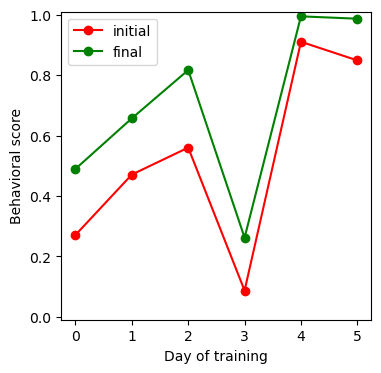

In [38]:
# your solution here
